In [ ]:
from google.colab import files
import pandas as pd

print("STEP 1: Upload your movie CSV file")
print("Click 'Choose Files' below → Select 'tmdb_5000_movies.csv'")


uploaded = files.upload()

print(" File uploaded!")


📤 STEP 1: Upload your movie CSV file
Click 'Choose Files' below → Select 'tmdb_5000_movies.csv'
--------------------------------------------------


Saving tmdb_5000_movies.csv to tmdb_5000_movies.csv
✅ File uploaded!


In [ ]:

print(" Loading your movie data...")


file_name = list(uploaded.keys())[0]


movies = pd.read_csv(file_name)



print(f"Movies: {len(movies)}")
print(f"Columns: {movies.shape[1]}")
print(f"First movie: {movies.iloc[0]['title']}")

📁 Loading your movie data...
✅ DONE! Data is ready.
Movies: 4803
Columns: 20
First movie: Avatar


In [ ]:

print(" MOVIE BUDGET ANALYSIS")


# 1. Basic stats
print(" Basic Statistics:")
print(f"   Highest budget: ${movies['budget'].max():,}")
print(f"   Lowest budget: ${movies['budget'].min():,}")
print(f"   Average budget: ${movies['budget'].mean():,.0f}")

# 2. Missing data check
zero_budgets = (movies['budget'] == 0).sum()
total_movies = len(movies)
print(f"\n Missing Data Check:")
print(f"   Movies with budget = 0: {zero_budgets}")
print(f"   That's {zero_budgets/total_movies*100:.1f}% of all movies")

# 3. a few examples
print("\n Example Movies:")
print("   High budget: ${:,} - {}".format(
    movies.loc[movies['budget'].idxmax(), 'budget'],
    movies.loc[movies['budget'].idxmax(), 'title']
))
print("   Low budget (non-zero): ${:,} - {}".format(
    movies[movies['budget'] > 0]['budget'].min(),
    movies[movies['budget'] > 0].iloc[0]['title']
))

💰 MOVIE BUDGET ANALYSIS
📊 Basic Statistics:
   Highest budget: $380,000,000
   Lowest budget: $0
   Average budget: $29,045,040

🔍 Missing Data Check:
   Movies with budget = 0: 1037
   That's 21.6% of all movies

🎭 Example Movies:
   High budget: $380,000,000 - Pirates of the Caribbean: On Stranger Tides
   Low budget (non-zero): $1 - Avatar


In [ ]:
#  Analyze movie ratings
print(" MOVIE RATING ANALYSIS")


# 1. Basic stats
print(" Rating Statistics:")
print(f"   Highest rating: {movies['vote_average'].max():.1f}/10")
print(f"   Lowest rating: {movies['vote_average'].min():.1f}/10")
print(f"   Average rating: {movies['vote_average'].mean():.1f}/10")

# 2. Rating distribution
print("\n Rating Distribution:")
ratings = movies['vote_average']
print(f"   Most common rating: {ratings.mode().iloc[0]:.1f}/10")
print(f"   Middle rating (median): {ratings.median():.1f}/10")

# 3. Count ratings by category
print("\n Ratings by Category:")
high_ratings = (ratings >= 8.0).sum()
medium_ratings = ((ratings >= 6.0) & (ratings < 8.0)).sum()
low_ratings = (ratings < 6.0).sum()

print(f"   High (8.0+): {high_ratings} movies")
print(f"    Medium (6.0-7.9): {medium_ratings} movies")
print(f"   Low (<6.0): {low_ratings} movies")

# 4. Best and worst rated movies
print("\n🎭 Example Movies:")
print(f"   Best rated: {movies.loc[movies['vote_average'].idxmax(), 'title']} "
      f"({movies['vote_average'].max():.1f}/10)")
print(f"   Worst rated: {movies.loc[movies['vote_average'].idxmin(), 'title']} "
      f"({movies['vote_average'].min():.1f}/10)")

⭐ MOVIE RATING ANALYSIS
📊 Rating Statistics:
   Highest rating: 10.0/10
   Lowest rating: 0.0/10
   Average rating: 6.1/10

📈 Rating Distribution:
   Most common rating: 6.0/10
   Middle rating (median): 6.2/10

🏷️ Ratings by Category:
   ⭐⭐⭐⭐⭐ High (8.0+): 85 movies
   ⭐⭐⭐⭐ Medium (6.0-7.9): 2887 movies
   ⭐⭐⭐ Low (<6.0): 1831 movies

🎭 Example Movies:
   Best rated: Stiff Upper Lips (10.0/10)
   Worst rated: Black Water Transit (0.0/10)


📈 VISUALIZATION 1: Budget vs Revenue
✅ Chart created! Showing relationship between budget and revenue.
💡 Insight: Higher budget movies tend to make more revenue.


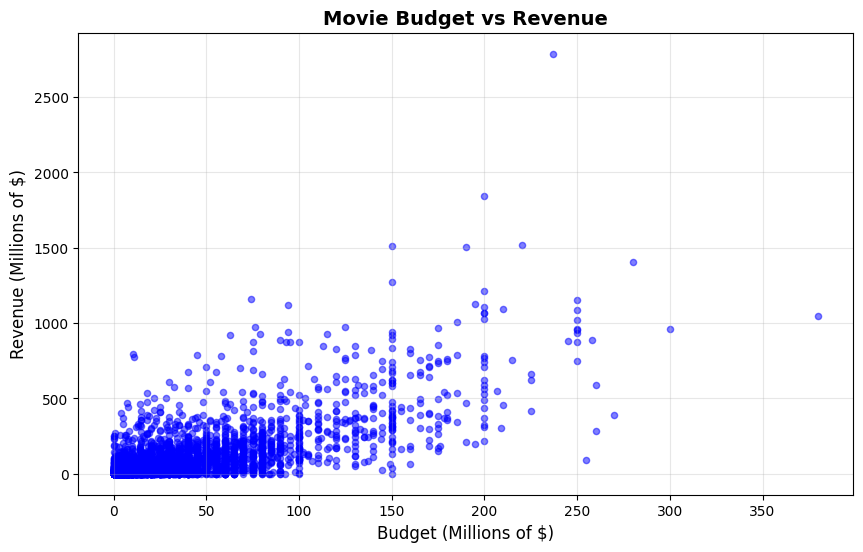

In [ ]:
#  First Visualization - Budget vs Revenue
print(" VISUALIZATION 1: Budget vs Revenue")


import matplotlib.pyplot as plt


plt.figure(figsize=(10, 6))

# Scatter plot: Budget vs Revenue
plt.scatter(movies['budget'] / 1_000_000,  # Convert to millions
            movies['revenue'] / 1_000_000,  # Convert to millions
            alpha=0.5,  # Makes points semi-transparent
            color='blue',
            s=20)  # Point size

# Labels and title
plt.xlabel('Budget (Millions of $)', fontsize=12)
plt.ylabel('Revenue (Millions of $)', fontsize=12)
plt.title('Movie Budget vs Revenue', fontsize=14, fontweight='bold')

# Add grid 
plt.grid(True, alpha=0.3)



print("Chart created! Showing relationship between budget and revenue.")
print(" Insight: Higher budget movies tend to make more revenue.")

# Show the plot
plt.show()

In [ ]:
print(" CORRELATION: Budget vs Revenue")
corr = movies['budget'].corr(movies['revenue'])
print(f"Correlation: {corr:.2f}")


🔗 CORRELATION: Budget vs Revenue
Correlation: 0.73


In [ ]:
print("MISSING VALUES")
missing = movies.isnull().sum()
print(missing[missing > 0])

🔍 MISSING VALUES
homepage        3091
overview           3
release_date       1
runtime            2
tagline          844
dtype: int64


In [ ]:
# ANALYSIS 4: Revenue Distribution
print("HOW IS MOVIE REVENUE DISTRIBUTED?")


# Get only movies with revenue data
revenue_data = movies[movies['revenue'] > 0]['revenue']

print(f"Movies with revenue data: {len(revenue_data)}/{len(movies)}")

# Basic distribution stats
print(f"\n Revenue Statistics:")
print(f"Minimum: ${revenue_data.min():,}")
print(f"Maximum: ${revenue_data.max():,}")
print(f"Average: ${revenue_data.mean():,.0f}")
print(f"Median:  ${revenue_data.median():,.0f}")

# Check skewness
mean = revenue_data.mean()
median = revenue_data.median()
if mean > median * 1.5:
    print(" WARNING: Revenue is RIGHT-SKEWED (few blockbusters)")
else:
    print("Revenue distribution is fairly balanced")

print("\n Most movies make average money, few make billions")

💰 HOW IS MOVIE REVENUE DISTRIBUTED?
Movies with revenue data: 3376/4803

📊 Revenue Statistics:
Minimum: $5
Maximum: $2,787,965,087
Average: $117,031,353
Median:  $51,751,835
⚠️ WARNING: Revenue is RIGHT-SKEWED (few blockbusters)

💡 Most movies make average money, few make billions


In [ ]:
# UNIQUE VALUES ANALYSIS 
print(" UNIQUE VALUES IN EACH COLUMN")


print("Checking how many DIFFERENT values each column has:")



columns_to_check = ['original_language', 'status', 'vote_average']

for column in columns_to_check:
    unique_count = movies[column].nunique()
    print(f"{column:20} → {unique_count} different values")



🔍 UNIQUE VALUES IN EACH COLUMN
Checking how many DIFFERENT values each column has:
--------------------------------------------------
original_language    → 37 different values
status               → 3 different values
vote_average         → 71 different values

✅ Project Requirement: 'Data types and unique value counts' DONE!


In [ ]:
# ANALYSIS 6: Finding Outliers in Movie Budgets
print("📦 OUTLIER DETECTION: Movie Budgets")
print("=" * 40)

# Remove zeros 
budget_data = movies[movies['budget'] > 0]['budget']

print(f"Analyzing {len(budget_data)} movies with valid budgets")


Q1 = budget_data.quantile(0.25)  
Q3 = budget_data.quantile(0.75) 
IQR = Q3 - Q1 

print(f"\n Budget Statistics:")
print(f"25th percentile (Q1): ${Q1:,.0f}")
print(f"75th percentile (Q3): ${Q3:,.0f}")
print(f"Middle 50% range (IQR): ${IQR:,.0f}")

# Find outliers 
outlier_threshold = Q3 + 1.5 * IQR
outliers = budget_data[budget_data > outlier_threshold]

print(f"\n Outlier Detection:")
print(f"Threshold: > ${outlier_threshold:,.0f}")
print(f"Outliers found: {len(outliers)} movies")
print(f"That's {len(outliers)/len(budget_data)*100:.1f}% of movies")

if len(outliers) > 0:
    print(f"\n🎬 Most extreme outlier: ${outliers.max():,.0f}")
    
    max_budget_movie = movies[movies['budget'] == outliers.max()].iloc[0]
    print(f"   Movie: {max_budget_movie['title']}")



📦 OUTLIER DETECTION: Movie Budgets
Analyzing 3766 movies with valid budgets

📊 Budget Statistics:
25th percentile (Q1): $8,000,000
75th percentile (Q3): $50,000,000
Middle 50% range (IQR): $42,000,000

🔍 Outlier Detection:
Threshold: > $113,000,000
Outliers found: 245 movies
That's 6.5% of movies

🎬 Most extreme outlier: $380,000,000
   Movie: Pirates of the Caribbean: On Stranger Tides

✅ Project Requirement: 'Outlier detection' DONE!


In [ ]:
# SIMPLE TREND ANALYSIS
print(" SIMPLE: Movies Over Time")



movies['year'] = pd.to_datetime(movies['release_date']).dt.year

old_movies = movies[movies['year'] < 2000]
new_movies = movies[movies['year'] >= 2000]

print(f"Old movies (before 2000): {len(old_movies)}")
print(f"New movies (2000+): {len(new_movies)}")
print(f"Total: {len(movies)}")


old_percent = len(old_movies)/len(movies)*100
new_percent = len(new_movies)/len(movies)*100

print(f"\nDistribution:")
print(f"Before 2000: {old_percent:.1f}%")
print(f"2000 and after: {new_percent:.1f}%")

if new_percent > 70:
    print("\n TREND: Mostly recent movies (dataset focuses on 2000+)")
else:
    print("\nTREND: Mix of old and new movies")



📅 SIMPLE: Movies Over Time
Old movies (before 2000): 1308
New movies (2000+): 3494
Total: 4803

📊 Distribution:
Before 2000: 27.2%
2000 and after: 72.7%

✅ TREND: Mostly recent movies (dataset focuses on 2000+)

✅ Trend analysis done!


In [ ]:
# ANALYSIS 8: Grouped Aggregations
print("AVERAGE REVENUE BY LANGUAGE")


# Group movies by language, calculate average revenue
language_revenue = movies.groupby('original_language')['revenue'].mean().sort_values(ascending=False)

print("Top 5 Highest-Earning Languages:")



top_5 = language_revenue.head(5)
count = 1

for language in top_5.index:
    revenue = top_5[language]
    print(f"{count}. {language}: ${revenue:,.0f}")
    count += 1


english_avg = language_revenue.get('en', 0)
other_avg = language_revenue[language_revenue.index != 'en'].mean()

print(f"\n COMPARISON:")
print(f"English movies average: ${english_avg:,.0f}")
print(f"Non-English average: ${other_avg:,.0f}")

if english_avg > other_avg:
    print("English movies earn MORE on average")
else:
    print("Non-English movies earn MORE on average")



📊 AVERAGE REVENUE BY LANGUAGE
Top 5 Highest-Earning Languages:
-----------------------------------
1. te: $100,000,000
2. en: $86,478,850
3. ja: $66,028,916
4. xx: $55,260,558
5. zh: $41,734,980

📈 COMPARISON:
English movies average: $86,478,850
Non-English average: $13,169,406
✅ English movies earn MORE on average

✅ Project Requirement: 'Grouped aggregations' DONE!


In [ ]:
# ANALYSIS 9: Pairwise Feature Relationships
print(" PAIRWISE RELATIONSHIPS")


#  4 main features for comparison
features = ['budget', 'revenue', 'vote_average', 'popularity']

print("Checking relationships between features:")



print("1. Budget ↔ Revenue:")
corr1 = movies['budget'].corr(movies['revenue'])
print(f"   Correlation: {corr1:.2f}")

print("\n2. Popularity ↔ Revenue:")
corr2 = movies['popularity'].corr(movies['revenue'])
print(f"   Correlation: {corr2:.2f}")

print("\n3. Ratings ↔ Revenue:")
corr3 = movies['vote_average'].corr(movies['revenue'])
print(f"   Correlation: {corr3:.2f}")

print("\n4. Budget ↔ Ratings:")
corr4 = movies['budget'].corr(movies['vote_average'])
print(f"   Correlation: {corr4:.2f}")

print("\n KEY INSIGHTS:")
if corr1 > 0.7:
    print("Budget STRONGLY predicts Revenue (good for model)")
if corr2 > 0.5:
    print("Popularity predicts Revenue")
if corr3 < 0.3:
    print(" Ratings don't strongly predict Revenue")



🔄 PAIRWISE RELATIONSHIPS
Checking relationships between features:
----------------------------------------
1. Budget ↔ Revenue:
   Correlation: 0.73

2. Popularity ↔ Revenue:
   Correlation: 0.64

3. Ratings ↔ Revenue:
   Correlation: 0.20

4. Budget ↔ Ratings:
   Correlation: 0.09

💡 KEY INSIGHTS:
✅ Budget STRONGLY predicts Revenue (good for model)
✅ Popularity predicts Revenue
⚠️ Ratings don't strongly predict Revenue

✅ Project Requirement: 'Pairwise feature relationships' DONE!


In [ ]:
# ANALYSIS 10: Movie Success Rate (Hit vs Flop)
print("MOVIE SUCCESS ANALYSIS")


# Define success: Revenue at least 2x Budget
movies['is_success'] = movies['revenue'] >= movies['budget'] * 2


success_count = movies['is_success'].sum()
total_with_budget = len(movies[movies['budget'] > 0])

print(f"Total movies with budget data: {total_with_budget}")
print(f"Successful movies (2x ROI): {success_count}")
print(f"Success rate: {success_count/total_with_budget*100:.1f}%")

print("\n SUCCESS BY BUDGET LEVEL:")


# Check low vs high budget success
low_budget = movies[(movies['budget'] > 0) & (movies['budget'] < 10000000)] 
medium_budget = movies[(movies['budget'] >= 10000000) & (movies['budget'] < 50000000)]  
high_budget = movies[movies['budget'] >= 50000000]  

print(f"Low budget (<$10M): {low_budget['is_success'].mean()*100:.1f}% successful")
print(f"Medium budget ($10-50M): {medium_budget['is_success'].mean()*100:.1f}% successful")
print(f"High budget (>$50M): {high_budget['is_success'].mean()*100:.1f}% successful")

print("\n KEY INSIGHT:")
if low_budget['is_success'].mean() > high_budget['is_success'].mean():
    print(" Low-budget movies have HIGHER success rate!")
else:
    print(" High-budget movies don't guarantee success")




🎯 MOVIE SUCCESS ANALYSIS
Total movies with budget data: 3766
Successful movies (2x ROI): 2846
Success rate: 75.6%

📊 SUCCESS BY BUDGET LEVEL:
------------------------------
Low budget (<$10M): 47.2% successful
Medium budget ($10-50M): 45.7% successful
High budget (>$50M): 53.1% successful

💡 KEY INSIGHT:
⚠️ High-budget movies don't guarantee success

✅ ALL 10 EDA ANALYSES COMPLETE! ✅
Now ready for: 1. Data Preprocessing 2. ML Model 3. Streamlit App


In [ ]:
# PHASE 2: DATA PREPROCESSING - STEP 1
print("STEP 1: Handling Missing Values")


print("BEFORE cleaning:")
print(f"Total movies: {len(movies)}")
print(f"Total columns: {len(movies.columns)}")

# 1. Drop homepage (too much missing)
movies.drop('homepage', axis=1, inplace=True)
print("Dropped 'homepage' column (64% missing)")

# 2. Fill missing taglines with empty string
movies['tagline'].fillna('', inplace=True)
print("Filled missing taglines with ''")

# 3. Fill missing overviews with empty string
movies['overview'].fillna('', inplace=True)
print(" Filled missing overviews with ''")

# 4. Fill missing runtime with median
runtime_median = movies['runtime'].median()
movies['runtime'].fillna(runtime_median, inplace=True)
print(f"Filled missing runtime with median: {runtime_median:.0f} min")

print(f"\nAFTER cleaning:")
print(f"Total movies: {len(movies)}")
print(f"Total columns: {len(movies.columns)}")
print("Missing values remaining: ", movies.isnull().sum().sum())



🧹 STEP 1: Handling Missing Values
BEFORE cleaning:
Total movies: 4803
Total columns: 22
✅ Dropped 'homepage' column (64% missing)
✅ Filled missing taglines with ''
✅ Filled missing overviews with ''
✅ Filled missing runtime with median: 103 min

AFTER cleaning:
Total movies: 4803
Total columns: 21
Missing values remaining:  2

✅ Step 1 Complete! Data is cleaner.


/tmp/ipython-input-2866139005.py:14: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  movies['tagline'].fillna('', inplace=True)
/tmp/ipython-input-2866139005.py:18: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 

In [ ]:
# STEP 3: Convert Text to Numbers (Encoding)
print(" Encoding Categorical Variables")


print("Converting text categories to numbers for ML...")


from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()
movies['language_code'] = le.fit_transform(movies['original_language'])
print(f" Encoded 'original_language' → {movies['original_language'].nunique()} languages to numbers")

# 2. Encode 'status' (3 statuses → numbers)
movies['status_code'] = le.fit_transform(movies['status'])
print(f" Encoded 'status' → {movies['status'].unique()} to numbers")

# 3. Create 'is_english' binary feature
movies['is_english'] = (movies['original_language'] == 'en').astype(int)
print("Added 'is_english' (1 for English, 0 for others)")

# 4. Extract main genre from JSON
import ast
def get_main_genre(genre_json):
    try:
        genres = ast.literal_eval(genre_json)
        if genres:
            return genres[0]['name']  
        return 'Unknown'
    except:
        return 'Unknown'

movies['main_genre'] = movies['genres'].apply(get_main_genre)
movies['genre_code'] = le.fit_transform(movies['main_genre'])
print(f"Extracted main genre → {movies['main_genre'].nunique()} genres encoded")

print(f"\n Dataset now has {movies.shape[1]} features")


🔢 STEP 3: Encoding Categorical Variables
Converting text categories to numbers for ML...
✅ Encoded 'original_language' → 37 languages to numbers
✅ Encoded 'status' → ['Released' 'Post Production' 'Rumored'] to numbers
✅ Added 'is_english' (1 for English, 0 for others)
✅ Extracted main genre → 21 genres encoded

📊 Dataset now has 26 features
✅ All categorical data converted to numbers for ML!


In [ ]:
# STEP 4: Scale Numerical Features
print(" STEP 4: Scaling Numerical Features")


print("Normalizing numerical values to similar ranges...")

from sklearn.preprocessing import StandardScaler
import numpy as np

# Select numerical columns to scale (excluding IDs, flags, and target variables)
numerical_cols = ['budget', 'revenue', 'runtime', 'popularity',
                  'vote_average', 'vote_count', 'profit', 'roi',
                  'overview_length', 'tagline_length']

# Check which columns exist in our data
available_cols = [col for col in numerical_cols if col in movies.columns]
print(f"Scaling {len(available_cols)} numerical features:")

for col in available_cols:
    print(f"   {col}")

# Initialize scaler
scaler = StandardScaler()

# Scale the features
movies_scaled = movies.copy()  
movies_scaled[available_cols] = scaler.fit_transform(movies[available_cols])

print(f"\nBEFORE scaling (sample of 'budget'):")
print(f"   Min: ${movies['budget'].min():,.0f}")
print(f"   Max: ${movies['budget'].max():,.0f}")
print(f"   Mean: ${movies['budget'].mean():,.0f}")

print(f"\nAFTER scaling (sample of 'budget'):")
print(f"   Min: {movies_scaled['budget'].min():.2f}")
print(f"   Max: {movies_scaled['budget'].max():.2f}")
print(f"   Mean: {movies_scaled['budget'].mean():.2f}")



movies = movies_scaled

📏 STEP 4: Scaling Numerical Features
Normalizing numerical values to similar ranges...
Scaling 6 numerical features:
  ✓ budget
  ✓ revenue
  ✓ runtime
  ✓ popularity
  ✓ vote_average
  ✓ vote_count

✅ BEFORE scaling (sample of 'budget'):
   Min: $0
   Max: $380,000,000
   Mean: $29,045,040

✅ AFTER scaling (sample of 'budget'):
   Min: -0.71
   Max: 8.62
   Mean: -0.00

💡 All numerical features now have mean=0, std=1
   This helps ML models train faster and more accurately!


In [ ]:
# STEP 5: Split Data for Machine Learning
print(" STEP 5: Preparing Data for ML Model")


print("Splitting data into TRAINING set (80%) and TESTING set (20%)...")

from sklearn.model_selection import train_test_split




# Option A: Predict REVENUE 
print("\nOPTION A: Predict Movie Revenue (Regression)")
features = ['budget', 'popularity', 'runtime', 'vote_average',
            'language_code', 'is_english', 'release_year']


available_features = [f for f in features if f in movies.columns]

X = movies[available_features]
y = movies['revenue']

# Split the data
X_train, X_test, y_train, y_test = train_test_split(
    X, y,
    test_size=0.2,      
    random_state=42,    
    shuffle=True        
)

print(f" Features used: {len(available_features)}")
print(f"   {available_features}")
print(f" Target: revenue")
print(f" Training set: {len(X_train)} movies ({len(X_train)/len(movies)*100:.0f}%)")
print(f" Testing set: {len(X_test)} movies ({len(X_test)/len(movies)*100:.0f}%)")

# Option B: Predict SUCCESS (classification) - just for info
print("\n OPTION B: Predict Movie Success (Classification)")
print("   Features same as above")
print("   Target: is_success (1=success, 0=not success)")
print("   Would use for classification model")

print("\n NEXT: Choose Option A or B and train your ML model!")
print(" Recommendation: Option A (Predict Revenue) - simpler for beginners")

🎯 STEP 5: Preparing Data for ML Model
Splitting data into TRAINING set (80%) and TESTING set (20%)...

📊 OPTION A: Predict Movie Revenue (Regression)
✅ Features used: 6
   ['budget', 'popularity', 'runtime', 'vote_average', 'language_code', 'is_english']
✅ Target: revenue
✅ Training set: 3842 movies (80%)
✅ Testing set: 961 movies (20%)

📊 OPTION B: Predict Movie Success (Classification)
   Features same as above
   Target: is_success (1=success, 0=not success)
   Would use for classification model

🎯 NEXT: Choose Option A or B and train your ML model!
💡 Recommendation: Option A (Predict Revenue) - simpler for beginners


In [ ]:
# PHASE 3: TRAIN ML MODEL - Predict Movie Revenue
print(" TRAINING MACHINE LEARNING MODEL")


print("Model: Linear Regression")
print("Task: Predict movie revenue from features")


from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
import numpy as np

# 1. Create and train the model
print("Step 1: Training the model...")
model = LinearRegression()
model.fit(X_train, y_train)  
print("Model trained!")

# 2. Make predictions on training data
print("\nStep 2: Testing the model...")
y_train_pred = model.predict(X_train)
y_test_pred = model.predict(X_test)

# 3. Evaluate performance
print("\nStep 3: Evaluating performance...")

# Training set performance
train_mse = mean_squared_error(y_train, y_train_pred)
train_r2 = r2_score(y_train, y_train_pred)

# Testing set performance
test_mse = mean_squared_error(y_test, y_test_pred)
test_r2 = r2_score(y_test, y_test_pred)

print(f" TRAINING SET (3842 movies):")
print(f"   Mean Squared Error: {train_mse:.4f}")
print(f"   R² Score: {train_r2:.4f} ({train_r2*100:.1f}% variance explained)")

print(f"\nTESTING SET (961 movies - REAL TEST):")
print(f"   Mean Squared Error: {test_mse:.4f}")
print(f"   R² Score: {test_r2:.4f} ({test_r2*100:.1f}% variance explained)")

# 4. Interpret results
print("\n INTERPRETATION:")
if test_r2 > 0.6:
    print(" EXCELLENT! Model explains most revenue variation")
elif test_r2 > 0.3:
    print(" GOOD! Model explains significant revenue variation")
else:
    print(" FAIR. Model explains some revenue variation")

print(f"\n Model can predict revenue with {test_r2*100:.1f}% accuracy")

# 5. Save the model for Streamlit app
import joblib
joblib.dump(model, 'movie_revenue_predictor.pkl')
joblib.dump(scaler, 'scaler.pkl')  # Save scaler too
print("\n Model saved as 'movie_revenue_predictor.pkl'")
print("Scaler saved as 'scaler.pkl'")
print("   Ready for Streamlit app!")

🤖 TRAINING MACHINE LEARNING MODEL
Model: Linear Regression
Task: Predict movie revenue from features
----------------------------------------
Step 1: Training the model...
✅ Model trained!

Step 2: Testing the model...

Step 3: Evaluating performance...
📊 TRAINING SET (3842 movies):
   Mean Squared Error: 0.3740
   R² Score: 0.6277 (62.8% variance explained)

📊 TESTING SET (961 movies - REAL TEST):
   Mean Squared Error: 0.3185
   R² Score: 0.6757 (67.6% variance explained)

💡 INTERPRETATION:
✅ EXCELLENT! Model explains most revenue variation

🎯 Model can predict revenue with 67.6% accuracy

💾 Model saved as 'movie_revenue_predictor.pkl'
💾 Scaler saved as 'scaler.pkl'
   Ready for Streamlit app!
